In [1]:
+AGE+C(CHAimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, confusion_matrix

path = '/home/piai/Downloads/big_data/'

In [2]:
df_raw = pd.read_csv(path+'HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3748 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3748 non-null   object 
 6   YOJ      3748 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3748 non-null   float64
 9   CLAGE    3748 non-null   float64
 10  NINQ     3748 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [41]:
df_raw['JOB']

0        Other
1        Other
2       Office
3          Mgr
4       Office
         ...  
3743     Other
3744     Other
3745     Other
3746     Other
3747     Other
Name: JOB, Length: 3748, dtype: object

In [9]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [10]:
df_raw['JOB'].fillna('Other',inplace=True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [11]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print(df_train.shape)
print(df_test.shape)

(2623, 13)
(1125, 13)


In [14]:
for col in df_train.columns:
    print(col, end='+')

BAD+LOAN+MORTDUE+VALUE+REASON+JOB+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC+

In [15]:
log_model = Logit.from_formula('BAD~LOAN+MORTDUE+VALUE+C(REASON)+\
C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC', df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.2257
Time:                        10:48:52   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [16]:
# C(JOB)[T.Sales]

import math
math.exp(1.1323) # 직업이 세일즈인 사람은 세일즈가 아닌 사람 대비 3배 연체고객이 될 확률이 높다.
# 위 계수 1.13은 오즈비이다. 1보다 크므로 연체가능성이 크다는 것. 
# 이것을 로그를 떼어내서보니 3.1배가 나왔다. 이것은 오즈비이니, 무엇 대비해서 3배정도 연체가능성이 높다는 의미이다.

3.102784704367528

In [18]:
df_train['JOB'].unique()
# 연체 가능성에 대해서 보니 Mgr이 빠져있다. Mgr 대비 나머지가 오즈비만큼 더 가능성이 높다는 의미이다.
# Mgr은 알파벳 순서대로 하다보니 선택된 것 같다.

array(['Office', 'ProfExe', 'Other', 'Mgr', 'Self', 'Sales'], dtype=object)

# 29페이지 실습

In [18]:
df_commo = pd.read_csv(path + '통신고객이탈.csv')
df_commo['CHURN'] = df_commo['CHURN'].map(({'Active':0, 'Churned':1}))
df_commo.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [19]:
df_commo.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [20]:
df_commo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    int64  
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 109.1+ K

In [21]:
df_train, df_test = train_test_split(df_commo, test_size = 0.3, random_state = 1234)

print(df_train.shape)
print(df_test.shape)

(651, 15)
(279, 15)


In [22]:
# # obj_cols = [['CUSTOMER_ID','GENDER','CHARGE_TYPE','HANDSET','USAGE_BAND']]df_logistic_coef_commo = pd.DataFrame({'Coef':log_result_commo.params.values[1:]}, index = log_model.exog_names[1:])
# df_logistic_coef.plot.barh(y = 'Coef')
# # for col in obj_cols:
# #     print(df_commo[col].value_counts())

In [23]:
log_model_commo = Logit.from_formula('CHURN~C(GENDER)+AGE+C(CHARGE_TYPE)+C(HANDSET)+C(USAGE_BAND)+SERVICE_DURATION+DROPPED_CALLS+PEAK_CALLS_NO+PEAK_CALLS_TIME+WEEKEND_CALLS_NO+WEEKEND_CALLS_TIME+TOTAL_CALLS_NO+TOTAL_CALLS_TIME', df_train)
# df_commo.value_counts()
log_result_commo = log_model_commo.fit()
print(log_result_commo.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5059
Time:                        16:03:11   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.447     -0.012      0.991   -4072.307    4024.096
C(GENDER)[T.M]   

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
y_pred = log_result_commo.predict(df_test)
y_pred_class_commo = (y_pred > 0.5).astype(int)
y_pred_class_commo.head()

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [11]:
confusion_matrix(df_test['CHURN'], y_pred_class_commo)

array([[227,   8],
       [ 15,  29]])

<AxesSubplot:>

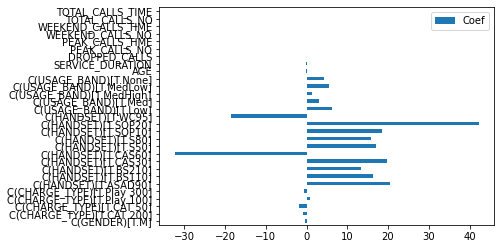

In [17]:
df_logistic_coef_commo = pd.DataFrame({'Coef':log_result_commo.params.values[1:]}, index = log_model_commo.exog_names[1:])
df_logistic_coef_commo.plot.barh(y = 'Coef')

In [11]:
cat_features = ["workclass", "education_num", "marital_status",
"occupation", "relationship", "race",
"sex","native_country", "income"]

In [17]:
pd.Categorical(df_commo['GENDER']).codes

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,